In [1]:
import LHE_RnW as reader

import numpy as np
import hist
alphaEM= 1/137.

In [2]:
path_to_madgraph = '/Users/innesbigaran/madstuff/devJuly2024'

In [5]:
lhe_ME=path_to_madgraph+"/EVAnlp_emu_aaa_FullME/Events/run_01/unweighted_events.lhe"
read_ME=reader.processfile3a(lhe_ME)
PlotME=reader.FillHistogram(read_ME) 

Number of events: 400000
Cross Section (pb): 2.297683e-05
Weight (pb): 5.7442064e-11
20.787593656808294


In [6]:
lhe_MEaa=path_to_madgraph+"/EVAnlp_emu_aa_FullME_5TeV/Events/run_01/unweighted_events.lhe"
read_MEaa=reader.processfile2a(lhe_MEaa)
PlotMEaa=reader.FillHistogram(read_MEaa) 

Number of events: 400000
Cross Section (pb): 0.003895113
Weight (pb): 9.7377813e-09
3590.4660320272214


In [7]:
lhe_MEaaCUT=path_to_madgraph+"/EVAnlp_emu_aa_FullME_5TeV_maacut/Events/run_01/unweighted_events.lhe"
read_MEaaCUT=reader.processfile2a(lhe_MEaaCUT)
PlotMEaaCUT=reader.FillHistogram(read_MEaaCUT) 

Number of events: 400000
Cross Section (pb): 0.001269358
Weight (pb): 3.1733962e-09
1177.2189213345434


In [8]:
lhe_LLAPub="/Users/innesbigaran/madstuff/MG5_aMC_v3_5_3/EVA_vTvT_aaa_5TeV_muf450_p150/Events/run_01/unweighted_events.lhe"
read_LLAPub=reader.processfile3a(lhe_LLAPub)
PlotLLAPub=reader.FillHistogram(read_LLAPub) 

Number of events: 400000
Cross Section (pb): 1.353532e-05
Weight (pb): 3.3838306e-11
12.314605511035161


In [9]:
lhe_LLA_pT150=path_to_madgraph+"/EVA_vTvT_aaa_5TeV/Events/run_01/unweighted_events.lhe"
read_LLA_pT150=reader.processfile3a(lhe_LLA_pT150)
PlotLLA_pT150=reader.FillHistogram(read_LLA_pT150) 

Number of events: 400000
Cross Section (pb): 1.33283e-05
Weight (pb): 3.3320761e-11
12.10709850934282


In [10]:
lhe_LP_pT150=path_to_madgraph+"/EVA_vTvT_aaa_5TeV/Events/run_02/unweighted_events.lhe"
read_LP_pT150=reader.processfile3a(lhe_LP_pT150)
PlotLP_pT150=reader.FillHistogram(read_LP_pT150) 

Number of events: 400000
Cross Section (pb): 7.064858e-06
Weight (pb): 1.7662146e-11
6.4168872497012535


In [11]:
lhe_NLP_pT150="/Users/innesbigaran/madstuff/devJuly2024/EVA_vTvT_aaa_5TeV/Events/run_03/unweighted_events.lhe"
read_NLP_pT150=reader.processfile3a(lhe_NLP_pT150)
PlotNLP_pT150=reader.FillHistogram(read_NLP_pT150) 

Number of events: 400000
Cross Section (pb): 1.480778e-06
Weight (pb): -1.6055266e-11
0.8060385742639764


In [33]:
def Sudakov_Reweight(muf, pTmin):
    return ((alphaEM/(4.*np.pi)))*((np.log(muf**2/pTmin**2))**2)
    
xsecAA_ME=read_MEaa['xSec'] # Full matrix element
xsecAAA_LLA=read_LLA_pT150['xSec']
xsecAAA_LP=read_LP_pT150['xSec']
xsecAAA_NLP=read_NLP_pT150['xSec']
xsecAAA_LLAPub=read_LLAPub['xSec'] # Public version of LLA
xsecAA_MEcut=read_MEaaCUT['xSec'] # Full matrix element

RW_LLApub= xsecAA_ME*Sudakov_Reweight(450, 150)/xsecAAA_LLAPub
RW_LLA=xsecAA_ME*Sudakov_Reweight(450, 150)/xsecAAA_LLA
RW_LP=xsecAA_ME*Sudakov_Reweight(450, 150)/xsecAAA_LP
RW_NLP=xsecAA_ME*Sudakov_Reweight(450, 150)/xsecAAA_NLP
RW_NLPCut=xsecAA_MEcut*Sudakov_Reweight(450, 150)/xsecAAA_NLP

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
font = {'family':'serif', 'serif': ['computer modern roman']}
plt.rc('font',**font)
plt.rcParams['text.usetex'] = True

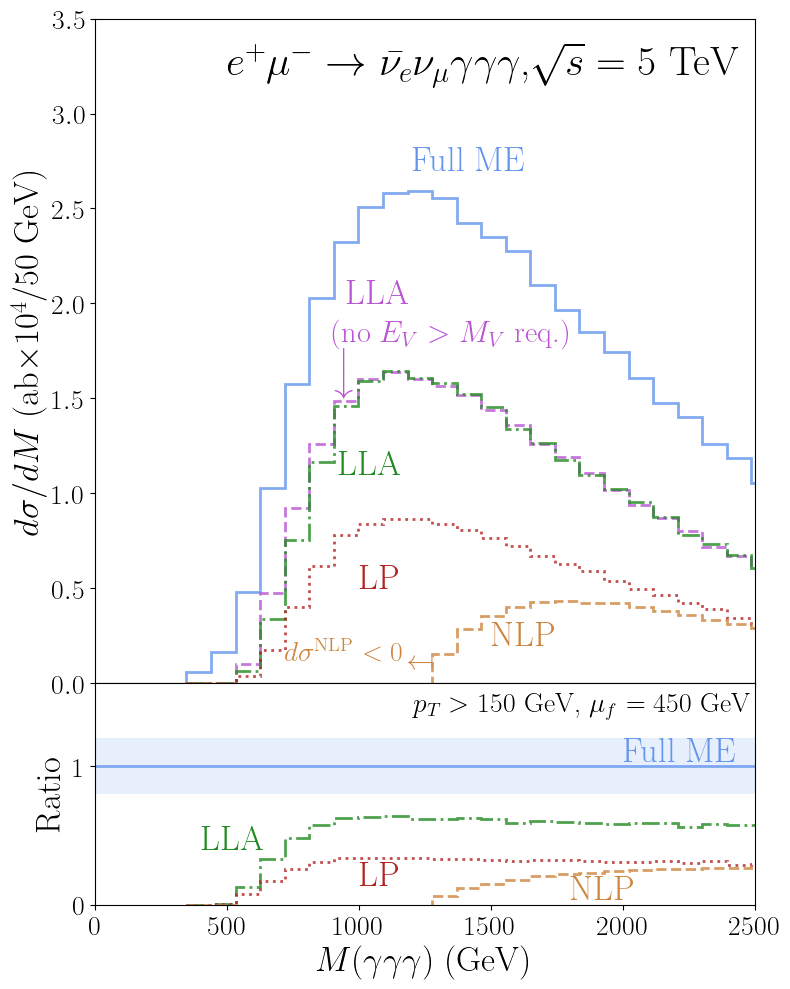

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace':0})
TLsize= 30
Ansize=20
Lsize=25
LSize=25
TitleSize=25
LW=2

ax2.axhline(1, color="cornflowerblue", alpha=0.8, linewidth=2, zorder=-2)
h1=ax1.hist(PlotME[0], PlotME[1], weights=PlotME[2]/50*(10**4), histtype='step',label="Full ME", linestyle='solid', color='cornflowerblue',alpha=0.8,linewidth=LW)

h8=ax1.hist(PlotLLAPub[0], PlotLLAPub[1], weights=(PlotLLAPub[2]/50)*(10**4), histtype='step',label="LLA", linestyle='dashed', color='mediumorchid',alpha=0.8,linewidth=LW)
h2=ax1.hist(PlotLLA_pT150[0], PlotLLA_pT150[1], weights=(PlotLLA_pT150[2])/50*(10.**4), histtype='step',label="LLA $[E_V> M_V]$", linestyle='dashdot', color='forestgreen',alpha=0.8,linewidth=LW)
h3=ax1.hist(PlotLP_pT150[0], PlotLP_pT150[1], weights=(PlotLP_pT150[2]/50)*(10**4), histtype='step',label="LP", linestyle='dotted', color='firebrick',alpha=0.8,linewidth=LW)
h4=ax1.hist(PlotNLP_pT150[0], PlotNLP_pT150[1], weights=(PlotNLP_pT150[2]/50)*(10**4), histtype='step',label="NLP", linestyle='dashed', color='peru',alpha=0.8,linewidth=LW)



RatiosLLA=reader.ArrayRatio(PlotLLA_pT150[2], PlotME[2])
RatiosLLAPublic=reader.ArrayRatio(PlotLLAPub[2], PlotME[2])
RatiosLP=reader.ArrayRatio(PlotLP_pT150[2], PlotME[2])
RatiosNLP=reader.ArrayRatio(PlotNLP_pT150[2], PlotME[2])

ax2.axhspan(0.8, 1.2, facecolor="cornflowerblue", alpha=0.15,  edgecolor='none', zorder=-2)
ax2.hist(PlotLLA_pT150[0], PlotLLA_pT150[1], weights=RatiosLLA, histtype='step',label="LLA",linestyle='dashdot',color='forestgreen', alpha=0.8,linewidth=LW)
ax2.hist(PlotLP_pT150[0], PlotLP_pT150[1], weights=RatiosLP, histtype='step',label="LP",linestyle='dotted', color='firebrick', alpha=0.8,linewidth=LW)
ax2.hist(PlotNLP_pT150[0], PlotNLP_pT150[1], weights=RatiosNLP, histtype='step',label="NLP",linestyle='dashed', color='peru', alpha=0.8,linewidth=LW)

ax1.annotate("$e^+ \mu^- \\to \\bar{\\nu_{e}}\\nu_{\\mu} \\gamma \\gamma \\gamma$,$\sqrt{s}=5$ TeV",(500,3.2), fontsize=TLsize, color='black')
ax2.annotate("$p_T>150$ GeV, $\\mu_f=450$ GeV", (1200,1.4), fontsize=20, color='black')
#ax1.annotate(" $\\mu_f=450$ GeV", (2000,1e-5), fontsize=Ansize, color='black')

ax1.annotate("Full ME", (1200,2.7), fontsize=LSize, color='cornflowerblue')
ax1.annotate("NLP", (1500,0.2), fontsize=LSize, color='peru')
ax1.annotate("LP", (1000,0.5), fontsize=LSize, color='firebrick')
ax1.annotate("LLA ", (920,1.1), fontsize=LSize, color='forestgreen')
ax1.annotate("LLA ", (950,2), fontsize=LSize, color='mediumorchid')
ax1.annotate("$($no $E_V> M_V$ req.)", (900,1.8), fontsize=22, color='mediumorchid')
ax1.annotate("$\\longrightarrow$", (880,1.52), fontsize=LSize, color='mediumorchid', rotation =-90)

ax1.annotate("$d\\sigma^{\\rm NLP}<0$", (720,0.12), fontsize=20, color='peru')
ax1.annotate("$\\mapsto$", (1178,0.10), fontsize=20, color='peru', rotation =-180)

ax2.annotate("NLP", (1800,0.04), fontsize=LSize, color='peru')
ax2.annotate("LP", (1000,0.14), fontsize=LSize, color='firebrick')
ax2.annotate("LLA", (400,0.4), fontsize=LSize, color='forestgreen')
ax2.annotate("Full ME", (2000,1.04), fontsize=LSize, color='cornflowerblue')


plt.xlim(0, 2500)
ax2.set_ylim(0, 1.6)
ax1.set_ylim(0,3.5)

plt.subplots_adjust(hspace=0)
ax1.set_ylabel(r'$d\sigma/dM$ (ab$\times 10^4$/50 GeV)',fontsize=TitleSize)
ax2.set_xlabel(r'$M (\gamma\gamma\gamma)$ (GeV)', fontsize=TitleSize)
ax2.set_ylabel(r'Ratio',fontsize=TitleSize)
ax1.tick_params(axis='both', labelsize=Ansize)
ax2.tick_params(axis='both', labelsize=Ansize)

plt.tight_layout()
plt.savefig("aaaSudhakov_5TeV_noSud.png", dpi=200)

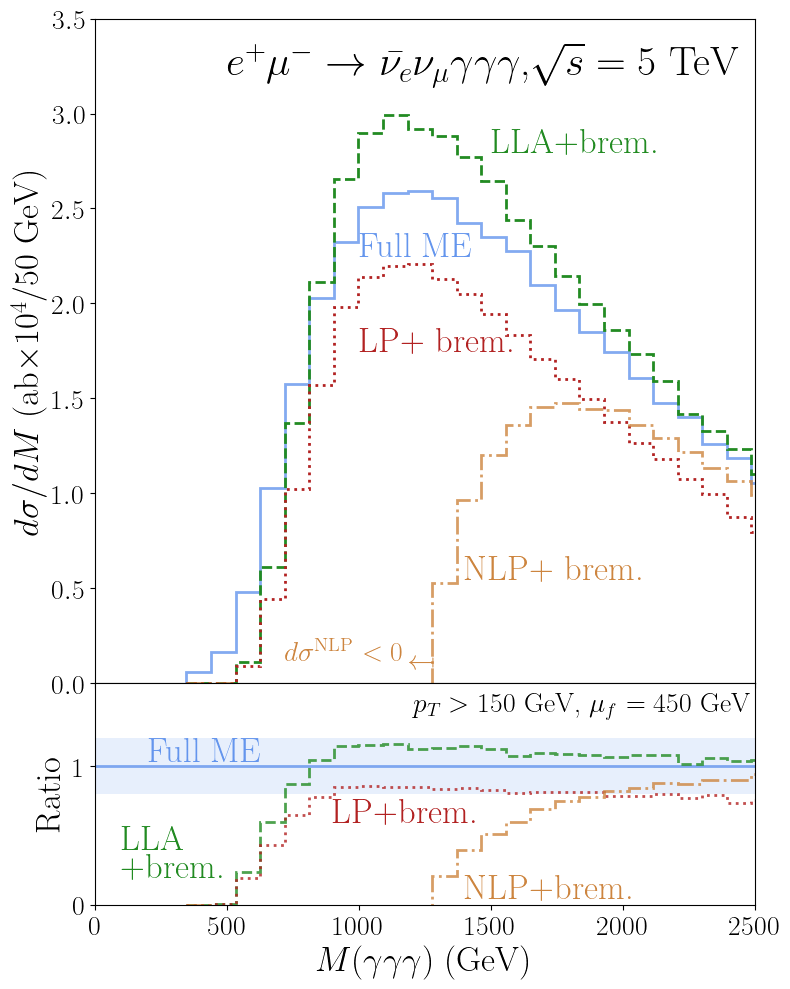

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace':0})
TLsize= 30
Ansize=20
Lsize=25
LSize=25
TitleSize=25
LW=2

ax2.axhline(1, color="cornflowerblue", alpha=0.8, linewidth=2, zorder=-2)
h1=ax1.hist(PlotME[0], PlotME[1], weights=PlotME[2]*(10**4)/50, histtype='step',label="Full ME", linestyle='solid', color='cornflowerblue',alpha=0.8,linewidth=LW)

#h9=ax1.hist(PlotLLAPub[0], PlotLLAPub[1], weights=(1+RW_LLApub)*PlotLLAPub[2]/50, histtype='step',label="LLA$\\times (1+r_{\\rm{brem.}})$", linestyle='dashed', color='mediumorchid',alpha=0.8,linewidth=1.5)
h5=ax1.hist(PlotLLA_pT150[0], PlotLLA_pT150[1], weights=(1+RW_LLA)*PlotLLA_pT150[2]*(10**4)/50, histtype='step',label="LLA$\\times (1+r_{\\rm{brem.}})$,  $[E_V> M_V]$", linestyle='dashed', color='forestgreen',linewidth=LW)
h6=ax1.hist(PlotLP_pT150[0], PlotLP_pT150[1], weights=(1+RW_LP)*PlotLP_pT150[2]*(10**4)/50, histtype='step',label="LP$\\times (1+r_{\\rm{brem.}})$ ", linestyle='dotted', color='firebrick',linewidth=LW)
h7=ax1.hist(PlotNLP_pT150[0], PlotNLP_pT150[1], weights=(1+RW_NLPCut)*PlotNLP_pT150[2]*(10**4)/50, histtype='step',label="NLP$\\times (1+r_{\\rm{brem.}})$", linestyle='dashdot', color='peru',alpha=0.8,linewidth=LW)


RatiosLLA_AA=reader.ArrayRatio((1+RW_LLA)*PlotLLA_pT150[2], PlotME[2])
RatiosLLAPublic=reader.ArrayRatio(PlotLLAPub[2], PlotME[2])
RatiosLP_AA=reader.ArrayRatio((1+RW_LP)*PlotLP_pT150[2], PlotME[2])
RatiosNLP_AA=reader.ArrayRatio((1+RW_NLPCut)*PlotNLP_pT150[2], PlotME[2])


ax2.axhspan(0.8, 1.2, facecolor="cornflowerblue", alpha=0.15,  edgecolor='none', zorder=-2)
ax2.hist(PlotLLA_pT150[0], PlotLLA_pT150[1], weights=RatiosLLA_AA, histtype='step',label="LLA",linestyle='dashed',color='forestgreen', alpha=0.8,linewidth=LW)
ax2.hist(PlotLP_pT150[0], PlotLP_pT150[1], weights=RatiosLP_AA, histtype='step',label="LP",linestyle='dotted', color='firebrick', alpha=0.8,linewidth=LW)
ax2.hist(PlotNLP_pT150[0], PlotNLP_pT150[1], weights=RatiosNLP_AA, histtype='step',label="NLP",linestyle='dashdot', color='peru', alpha=0.8,linewidth=LW)


ax1.annotate("$e^+ \mu^- \\to \\bar{\\nu_{e}}\\nu_{\\mu} \\gamma \\gamma \\gamma$,$\sqrt{s}=5$ TeV",(500,3.2), fontsize=TLsize, color='black')
ax2.annotate("$p_T>150$ GeV, $\\mu_f=450$ GeV", (1200,1.4), fontsize=20, color='black')
#ax1.annotate(" $\\mu_f=450$ GeV", (2000,1e-5), fontsize=Ansize, color='black')

ax1.annotate("Full ME", (1000,2.25), fontsize=LSize, color='cornflowerblue')
ax1.annotate("NLP+ brem.", (1400,0.55), fontsize=LSize, color='peru')
ax1.annotate("LP+ brem.", (1000,1.75), fontsize=LSize, color='firebrick')
ax1.annotate("LLA+brem. ", (1500,2.8), fontsize=LSize, color='forestgreen')
#ax1.annotate("LLA $($no $E_V> M_V$)", (900,0.000176), fontsize=LSize, color='mediumorchid')
#ax1.annotate("$\\rightarrow$", (1250,0.000166), fontsize=LSize, color='mediumorchid', rotation =-90)


ax1.annotate("$d\\sigma^{\\rm NLP}<0$", (720,0.12), fontsize=20, color='peru')
ax1.annotate("$\\mapsto$", (1180,0.10), fontsize=20, color='peru', rotation =-180)

ax2.annotate("NLP+brem.", (1400,0.05), fontsize=LSize, color='peru')
ax2.annotate("LP+brem. ", (900,0.6), fontsize=LSize, color='firebrick')
ax2.annotate("LLA ", (100,0.4), fontsize=LSize, color='forestgreen')
ax2.annotate("+brem. ", (100,0.2), fontsize=LSize, color='forestgreen')
ax2.annotate("Full ME", (200,1.04), fontsize=LSize, color='cornflowerblue')


#ax1.legend(loc=2, fontsize=12, framealpha=1, ncol=2)
#ax1.set_yscale("log")
plt.xlim(0, 2500)
ax2.set_ylim(0, 1.6)
ax1.set_ylim(0,3.5)

plt.subplots_adjust(hspace=0)
ax1.set_ylabel(r'$d\sigma/dM$ (ab$\times 10^4$/50 GeV)',fontsize=TitleSize)
ax2.set_xlabel(r'$M (\gamma\gamma\gamma)$ (GeV)', fontsize=TitleSize)
ax2.set_ylabel(r'Ratio',fontsize=TitleSize)
ax1.tick_params(axis='both', labelsize=Ansize)
ax2.tick_params(axis='both', labelsize=Ansize)


plt.tight_layout()
plt.savefig("aaaSudhakov_5TeV_Sud.png", dpi=200)